In [2]:
from mxnet import init, nd
from mxnet.gluon import nn


def getnet():
    net = nn.Sequential()
    net.add(nn.Dense(256, activation='relu'))
    net.add(nn.Dense(10))
    return net

net = getnet()

In [3]:
print(net.collect_params())

sequential0_ (
  Parameter dense0_weight (shape=(256, 0), dtype=float32)
  Parameter dense0_bias (shape=(256,), dtype=float32)
  Parameter dense1_weight (shape=(10, 0), dtype=float32)
  Parameter dense1_bias (shape=(10,), dtype=float32)
)


#### GLUONCV

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import mxnet as mx
from mxnet import gluon, nd, image
from mxnet.gluon.data.vision import transforms
from gluoncv.data.transforms import video
from gluoncv import utils
from gluoncv.model_zoo import get_model

148KB [00:00, 9244.75KB/s]             


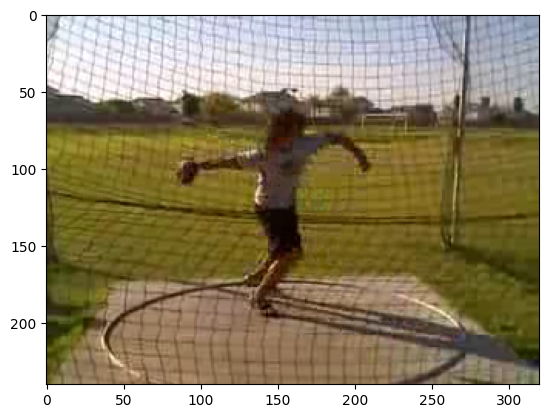

In [2]:
url = 'https://github.com/bryanyzhu/tiny-ucf101/raw/master/ThrowDiscus.png'
im_fname = utils.download(url)

img = image.imread(im_fname)

plt.imshow(img.asnumpy())
plt.show()

In [3]:
transform_fn = transforms.Compose([
    video.VideoCenterCrop(size=224),
    video.VideoToTensor(),
    video.VideoNormalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


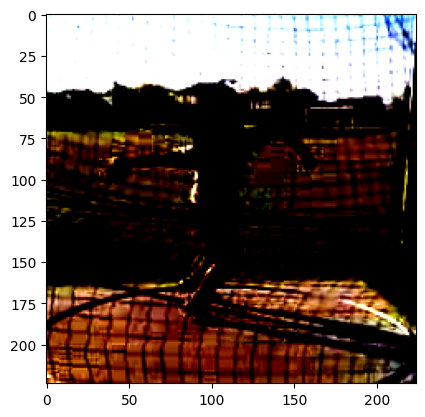

In [4]:
img_list = transform_fn([img.asnumpy()])
plt.imshow(np.transpose(img_list[0], (1,2,0)))
plt.show()

In [5]:
net = get_model('vgg16_ucf101', nclass=101, pretrained=True)

100%|██████████| 500159/500159 [00:15<00:00, 31425.40KB/s]


486864KB [00:15, 31776.53KB/s]                            


In [6]:
pred = net(nd.array(img_list[0]).expand_dims(axis=0))

classes = net.classes
topK = 5
ind = nd.topk(pred, k=topK)[0].astype('int')
print('The input video frame is classified to be')
for i in range(topK):
    print('\t[%s], with probability %.3f.'%
          (classes[ind[i].asscalar()], nd.softmax(pred)[0][ind[i]].asscalar()))

The input video frame is classified to be
	[ThrowDiscus], with probability 0.998.
	[HorseRace], with probability 0.001.
	[VolleyballSpiking], with probability 0.001.
	[Hammering], with probability 0.000.
	[TennisSwing], with probability 0.000.
